In [1]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    # '_for_experiment_not_screened_cols_top_50_features_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    ]

In [3]:
cv_analytics_utils: Dict[str, CvAnalyticsUtil] = {}

In [4]:
for filesuffix in filesuffixes:
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    print(filesuffix)
    cv_analytics_utils[filesuffix] = cv_analytics_util

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials


# TODO: Balance intervals by equal number of samples. 30+ samples. 0 to optimal operating poing. 

[0, 0.0033058500848710537, 0.06506957560777683, 0.09360663443803864, 0.16061016619205346, 0.21550166308879837, 0.29824855685233775, 0.4737804806232406, 0.8392226743700127, 1]


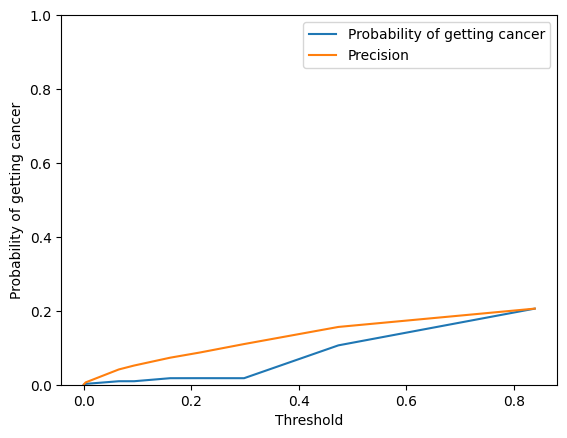

In [122]:
per_thereshold_metrics = bucket_predictions_by_thresholds(cv_analytics_util)
plot_threhold_probabilities(per_thereshold_metrics)

In [145]:
per_thereshold_metrics

,Threshold,True_Positive,False_Positive,True_Negative,False_Negative,Precision,Recall,True_Positive_Rate,False_Positive_Rate,bucket_positives,bucket_negatives,per_bucket_probability
0,0.000000,128,169313,0,0,0.000755,1.000000,1.000000,1.000000,NaN,NaN,NaN
1,0.003306,105,16786,152527,23,0.006216,0.820312,0.820312,0.099142,23.0,152527.0,0.000151
2,0.065070,70,1625,167688,58,0.041298,0.546875,0.546875,0.009598,35.0,15161.0,0.002303
3,0.093607,66,1205,168108,62,0.051928,0.515625,0.515625,0.007117,4.0,420.0,0.009434
4,0.160610,62,786,168527,66,0.073113,0.484375,0.484375,0.004642,4.0,419.0,0.009456
5,0.215502,59,619,168694,69,0.087021,0.460938,0.460938,0.003656,3.0,167.0,0.017647
6,0.298249,56,453,168860,72,0.110020,0.437500,0.437500,0.002676,3.0,166.0,0.017751
7,0.473780,53,286,169027,75,0.156342,0.414062,0.414062,0.001689,3.0,167.0,0.017647
8,0.839223,35,135,169178,93,0.205882,0.273438,0.273438,0.000797,18.0,151.0,0.106509
9,1.000000,0,0,169313,128,0.000000,0.000000,0.000000,0.000000,35.0,135.0,0.205882


_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.013333333333333334


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999852  | 0.000125063 | 0.999578   | 1         |
| recall__class_0    | 0.945593  | 0.00253234  | 0.941241   | 0.949159  |
| f1-score__class_0  | 0.971965  | 0.00133393  | 0.969681   | 0.973867  |
| precision__class_1 | 0.0109846 | 0.00228795  | 0.00682594 | 0.0135135 |
| recall__class_1    | 0.811905  | 0.161261    | 0.5        | 1         |
| f1-score__class_1  | 0.0216742 | 0.00450624  | 0.0134907  | 0.026616  |
| accuracy           | 0.945494  | 0.00252165  | 0.941176   | 0.9491    |
| auc                | 0.925187  | 0.0774096   | 0.730599   | 0.998342  |
+--------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


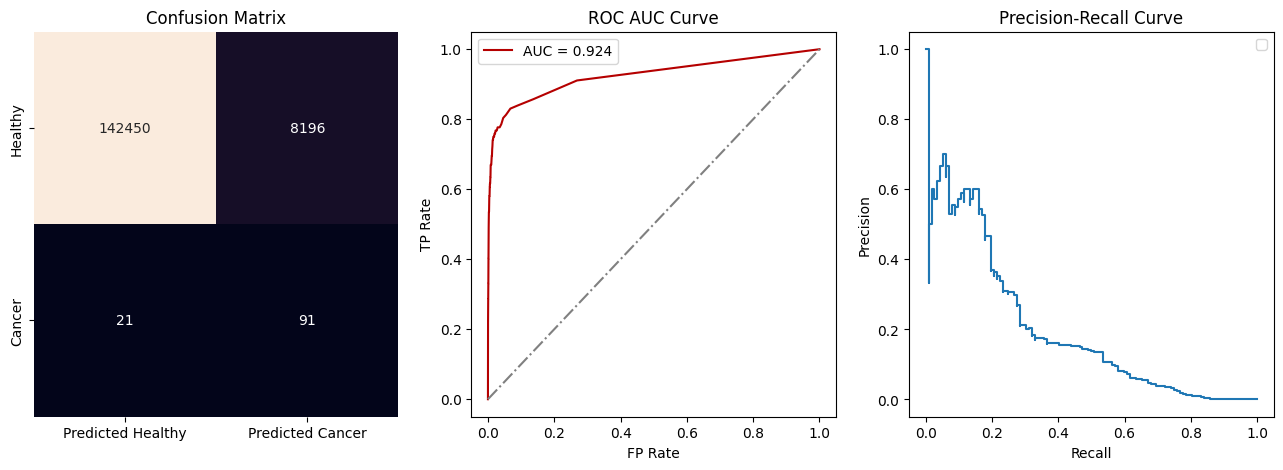

731
[0, 0.013333333333333334, 0.09, 0.11333333333333333, 0.15666666666666668, 0.18, 0.21333333333333335, 0.25333333333333335, 0.34, 1]


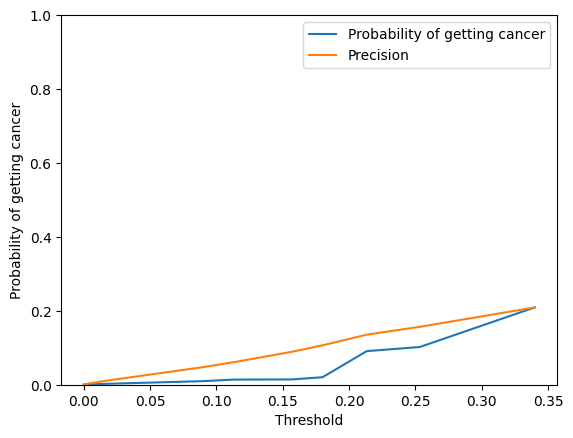

_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.043333333333333335


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.998899   | 0.000168609 | 0.998609   | 0.999173   |
| recall__class_0    | 0.67563    | 0.0070221   | 0.665969   | 0.686862   |
| f1-score__class_0  | 0.806041   | 0.00500748  | 0.799056   | 0.81397    |
| precision__class_1 | 0.00167826 | 0.000358667 | 0.00106641 | 0.0022897  |
| recall__class_1    | 0.422358   | 0.0879109   | 0.268293   | 0.560976   |
| f1-score__class_1  | 0.00334323 | 0.000714404 | 0.00212437 | 0.00456078 |
| accuracy           | 0.675304   | 0.00703173  | 0.665484   | 0.686447   |
| auc                | 0.562728   | 0.0669044   | 0.43876    | 0.676109   |

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


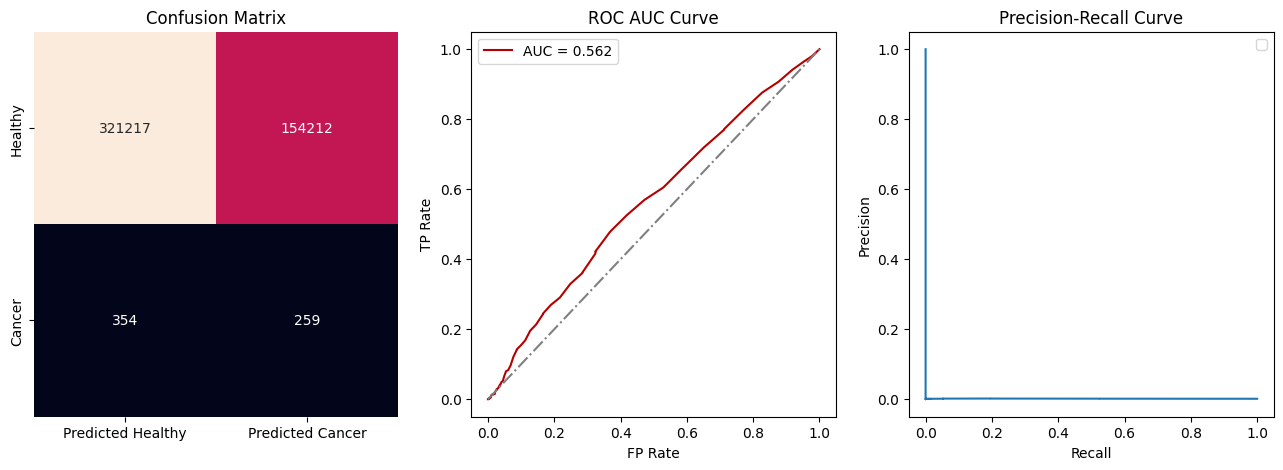

2374
[0, 0.043333333333333335, 0.5336558906347956, 0.6051654446003147, 0.661311608258928, 0.6718657673336315, 0.6991622869933144, 0.737502242773342, 0.777019227249016, 1]


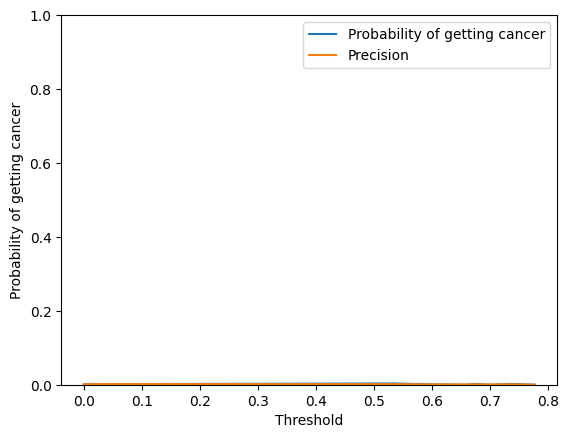

_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.01


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999838   | 0.000137423 | 0.999579   | 1         |
| recall__class_0    | 0.941291   | 0.00300834  | 0.937281   | 0.946534  |
| f1-score__class_0  | 0.969679   | 0.00156009  | 0.967575   | 0.972333  |
| precision__class_1 | 0.00992948 | 0.00219017  | 0.00547445 | 0.0124777 |
| recall__class_1    | 0.794048   | 0.178937    | 0.428571   | 1         |
| f1-score__class_1  | 0.0196117  | 0.00432205  | 0.0108108  | 0.0246046 |
| accuracy           | 0.941182   | 0.00293593  | 0.937231   | 0.946178  |
| auc                | 0.920403   | 0.0824636   | 0.76116    | 0.998357  |
+---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


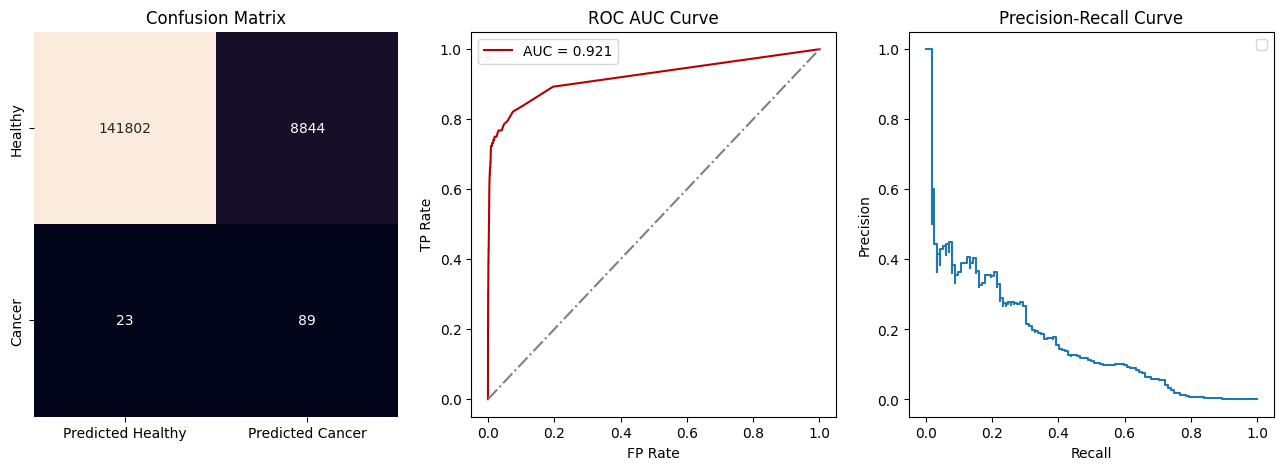

752
[0, 0.01, 0.09, 0.11333333333333333, 0.15666666666666668, 0.18333333333333332, 0.22133333333333344, 0.29333333333333333, 0.4166666666666667, 1]


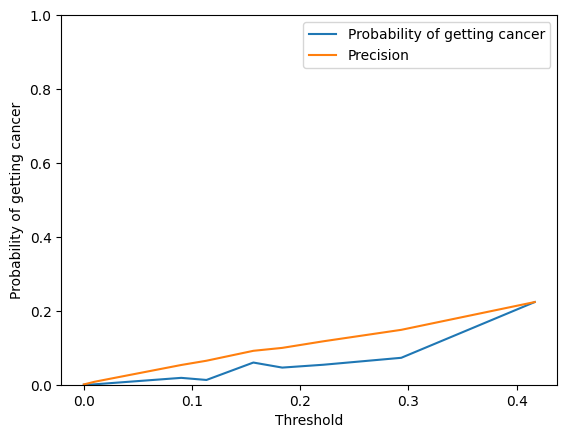

_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.005996827036142349


Cross-Validation measures:
+--------------------+-----------+------------+------------+-----------+
|                    |      mean |        std |        min |       max |
|--------------------+-----------+------------+------------+-----------|
| precision__class_0 | 0.999839  | 0.00011132 | 0.999679   | 1         |
| recall__class_0    | 0.944437  | 0.0112364  | 0.92617    | 0.963189  |
| f1-score__class_0  | 0.971316  | 0.00593119 | 0.96157    | 0.981199  |
| precision__class_1 | 0.010839  | 0.00299796 | 0.00660066 | 0.0186667 |
| recall__class_1    | 0.791667  | 0.150719   | 0.571429   | 1         |
| f1-score__class_1  | 0.0213714 | 0.00585109 | 0.0130506  | 0.0365535 |
| accuracy           | 0.944326  | 0.0112024  | 0.926022   | 0.963118  |
| auc                | 0.933237  | 0.0581     | 0.794297   | 0.99571   |
+--------------------+-----------+-

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


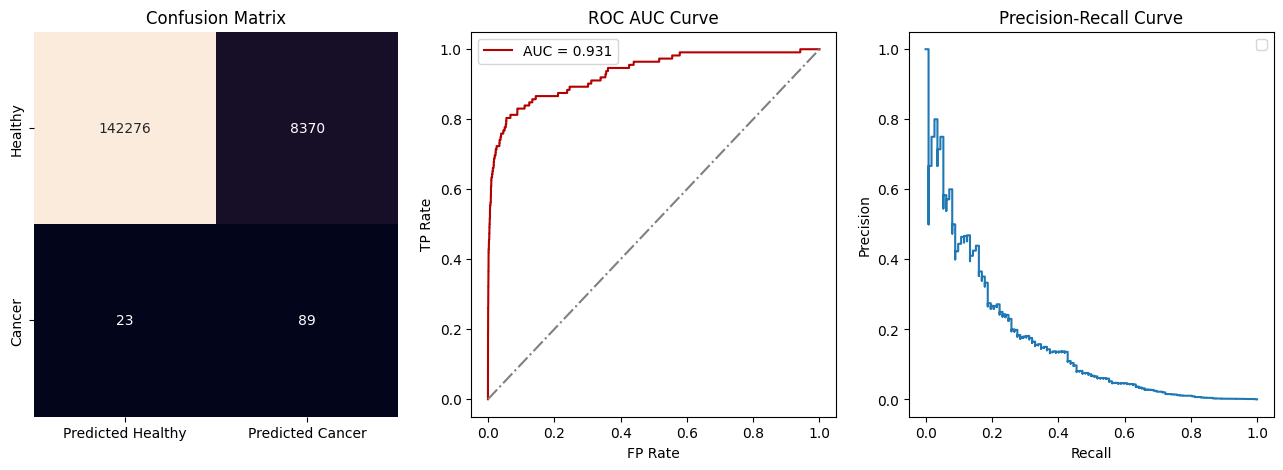

754
[0, 0.005996827036142349, 0.06446696147322648, 0.09837368022650679, 0.18161213397979736, 0.23773249685764314, 0.3415413320064544, 0.549434518814087, 0.8164732933044432, 1]


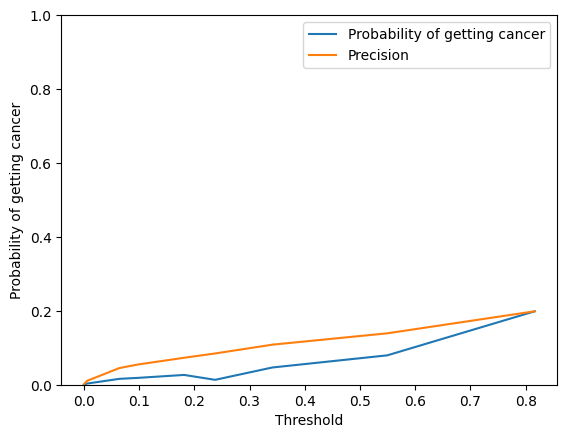

_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.259085088968277


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.998947   | 0.000276894 | 0.9985     | 0.999369   |
| recall__class_0    | 0.511314   | 0.0210062   | 0.481985   | 0.54749    |
| f1-score__class_0  | 0.676168   | 0.018254    | 0.650249   | 0.707298   |
| precision__class_1 | 0.00151842 | 0.000278414 | 0.00107476 | 0.00194126 |
| recall__class_1    | 0.578902   | 0.121833    | 0.390244   | 0.756098   |
| f1-score__class_1  | 0.00302889 | 0.000555574 | 0.00214362 | 0.00387258 |
| accuracy           | 0.511402   | 0.020864    | 0.482182   | 0.547431   |
| auc                | 0.562912   | 0.0685144   | 0.447926   | 0.646056   |
+----------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


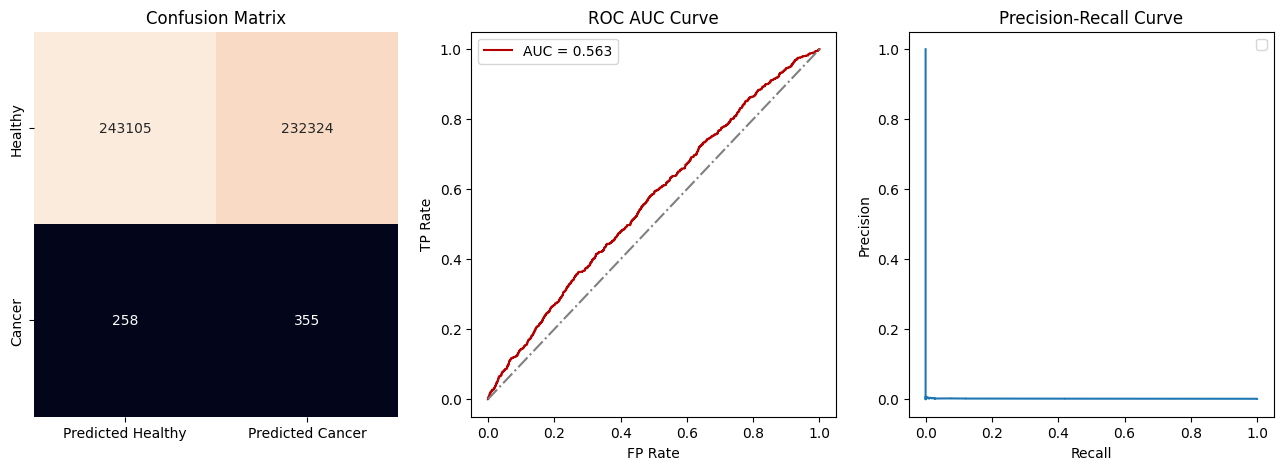

2381
[0, 0.259085088968277, 0.6714662176370618, 0.6850247979164124, 0.7017584443092346, 0.7100340127944946, 0.7205542922019958, 0.7352795004844666, 0.7567999362945557, 1]


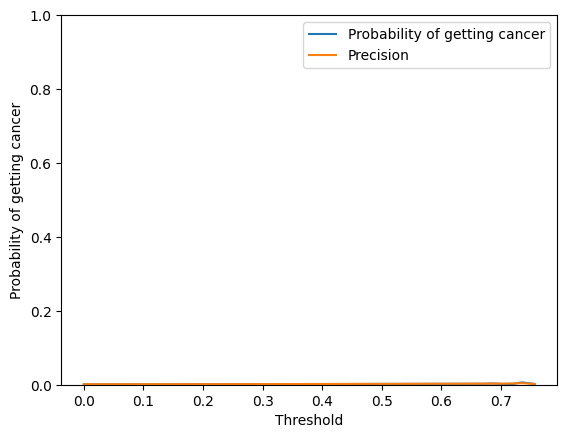

_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.0033058500848710537


Cross-Validation measures:
+--------------------+-----------+-------------+------------+------------+
|                    |      mean |         std |        min |        max |
|--------------------+-----------+-------------+------------+------------|
| precision__class_0 | 0.999844  | 0.000159698 | 0.999411   | 1          |
| recall__class_0    | 0.900819  | 0.0174097   | 0.879315   | 0.943303   |
| f1-score__class_0  | 0.94767   | 0.00952249  | 0.935782   | 0.970692   |
| precision__class_1 | 0.0062677 | 0.00147923  | 0.00273473 | 0.00924499 |
| recall__class_1    | 0.815741  | 0.184814    | 0.333333   | 1          |
| f1-score__class_1  | 0.0124345 | 0.00291681  | 0.00542495 | 0.0182371  |
| accuracy           | 0.900753  | 0.0173271   | 0.879401   | 0.943084   |
| auc                | 0.918183  | 0.0865031   | 0.643721   | 0.993966 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


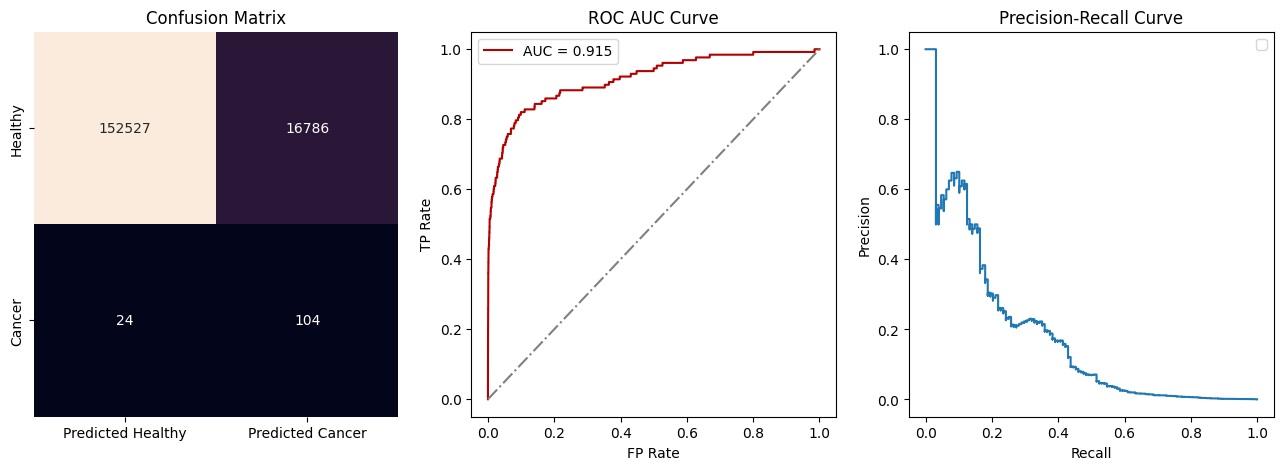

848
[0, 0.0033058500848710537, 0.06506957560777683, 0.09360663443803864, 0.16063235700130463, 0.21550457179546356, 0.29829869270324705, 0.47386050820350645, 0.8395225286483766, 1]


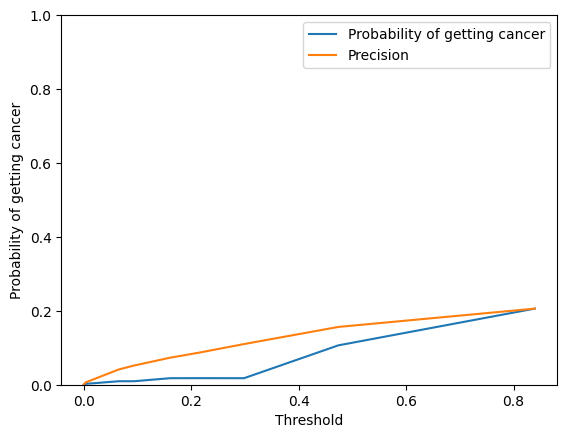

In [118]:
for filesuffix, cv_analytics_util in cv_analytics_utils.items():
    print(filesuffix)
    threshold = cv_analytics_util.get_optimal_operating_point()
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    per_thereshold_metrics = bucket_predictions_by_thresholds(cv_analytics_util)
    plot_threhold_probabilities(per_thereshold_metrics)

In [119]:
single_cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

FileNotFoundError: [Errno 2] No such file or directory: './stored_classes/cv_analytics_util/experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials.sav'



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000231329 | 0.999016 | 0.999823 |
| recall__class_0    | 0.996637  | 0.000857611 | 0.995399 | 0.998152 |
| f1-score__class_0  | 0.998085  | 0.000428087 | 0.997233 | 0.998767 |
| precision__class_1 | 0.0835833 | 0.0602229   | 0        | 0.176471 |
| recall__class_1    | 0.38277   | 0.241106    | 0        | 0.777778 |
| f1-score__class_1  | 0.133621  | 0.0912577   | 0        | 0.285714 |
| accuracy           | 0.996179  | 0.00085284  | 0.994482 | 0.997538 |
| auc                | 0.825113  | 0.109238    | 0.649522 | 0.982172 |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


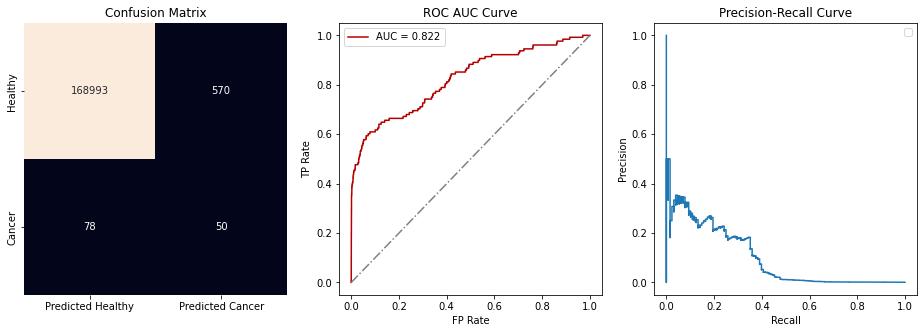

In [ ]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [ ]:
single_cv_analytics_util.merge_in_dataset(get_screened_first_5_no_process_dataset(label = f'cancer_in_next_1_years'))

Added new records: 249


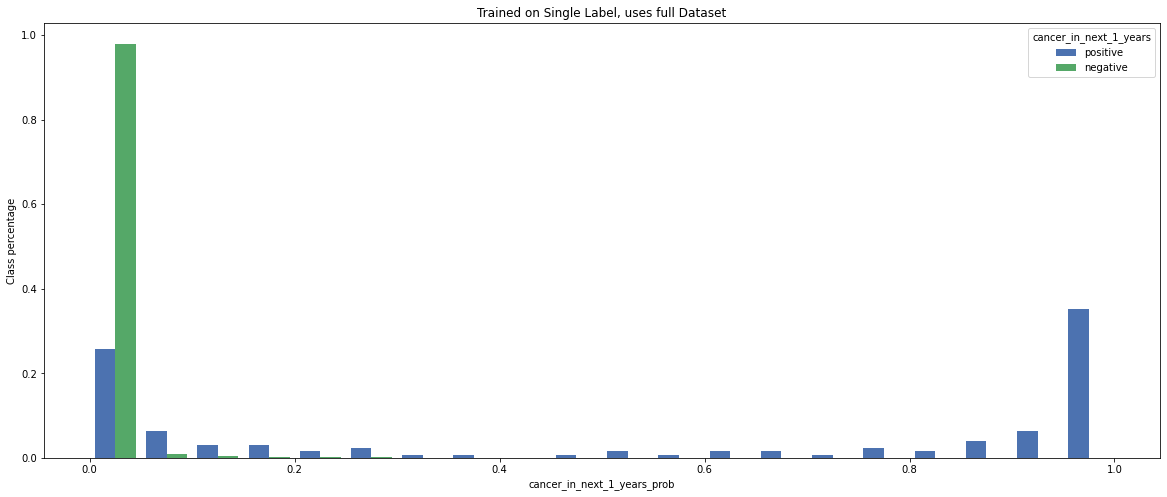

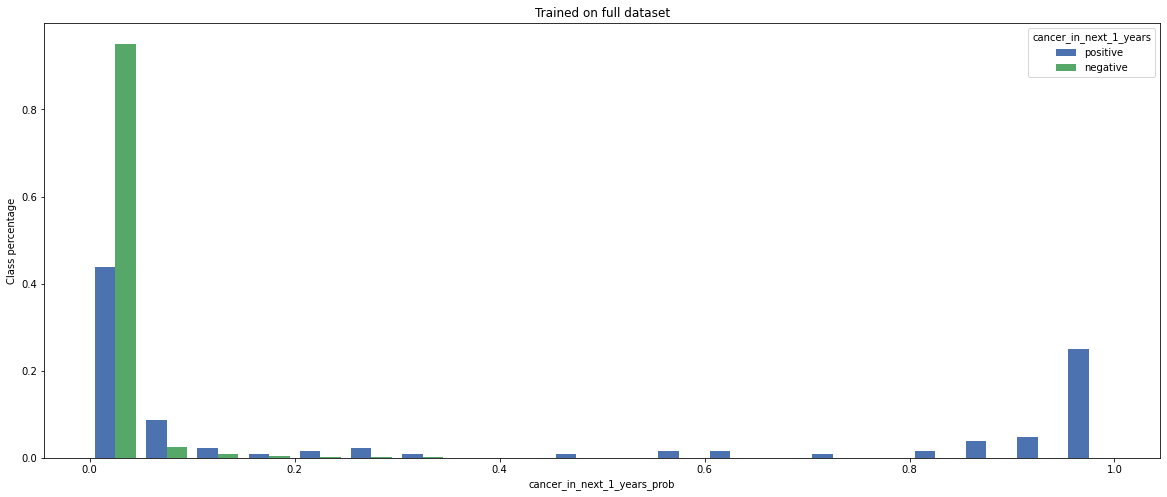

In [ ]:

full_dataset = single_cv_analytics_util.get_dataset_with_predictions()
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', num_bins = 20, normalize = True, title='Trained on Single Label, uses full Dataset')
full_dataset = cv_analytics_util.get_dataset_with_predictions()
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', num_bins = 20, normalize = True, title='Trained on full dataset')

# full_dataset = single_cv_analytics_util.get_dataset_with_predictions()
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
# full_dataset = cv_analytics_util.get_dataset_with_predictions()
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')